# ***Date string manipulations with Python***

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv("strings.csv")
df.head(5)

,date,number_of_strikes,center_point_geom
0,2016-08-05,16,POINT(-101.5 24.7)
1,2016-08-05,16,POINT(-85 34.3)
2,2016-08-05,16,POINT(-89 41.4)
3,2016-08-05,16,POINT(-89.8 30.7)
4,2016-08-05,16,POINT(-86.2 37.9)


Create new time columns

In [6]:
df['date'] = pd.to_datetime(df['date'])

Next, let's create four new columns: week, month, quarter, and year. We can do this by using the datetime.strftime() method of the datetime object. strftime is short for "string format time." We will use this method on the datetime data in the week column, and it will extract the information we specify, formatted as a string.

To specify the information to extract, we will use strftime format codes. You can find a full list of available codes to use in the strftime format codes documentation. In this case, we will use %Y for year, %V for week number, %q for quarter.

In [8]:
#create four new columns
df['week'] = df['date'].dt.strftime('%Y - W%V')
df['month'] = df['date'].dt.strftime('%Y - %m')
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y -Q%q')
df['year'] = df['date'].dt.strftime('%Y')

In [9]:
df.head(5)

,date,number_of_strikes,center_point_geom,week,month,quarter,year
0,2016-08-05,16,POINT(-101.5 24.7),2016 - W31,2016 - 08,2016 -Q3,2016
1,2016-08-05,16,POINT(-85 34.3),2016 - W31,2016 - 08,2016 -Q3,2016
2,2016-08-05,16,POINT(-89 41.4),2016 - W31,2016 - 08,2016 -Q3,2016
3,2016-08-05,16,POINT(-89.8 30.7),2016 - W31,2016 - 08,2016 -Q3,2016
4,2016-08-05,16,POINT(-86.2 37.9),2016 - W31,2016 - 08,2016 -Q3,2016


**Plot the number of weekly lightning strikes in 2018**

In [13]:
df_by_week_2018 = df[df['year'] == '2018'].groupby(['week']).sum('numeric_only=True').reset_index()
df_by_week_2018.head()

,week,number_of_strikes
0,2018 - W01,3171
1,2018 - W02,32590
2,2018 - W03,3350
3,2018 - W04,42355
4,2018 - W05,3501


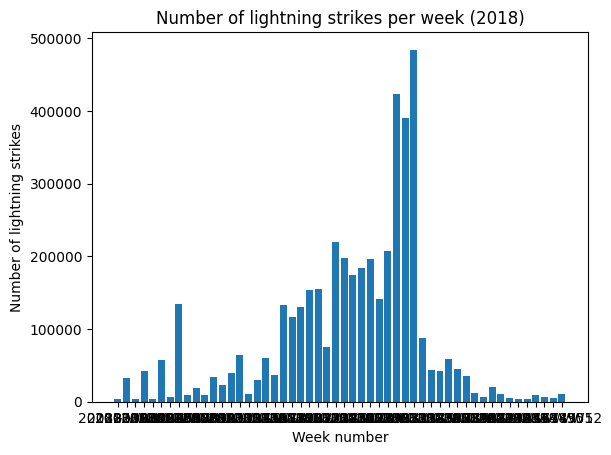

In [16]:
#plot graphs fr weekly strike in 2018
plt.bar(x = df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week (2018)");

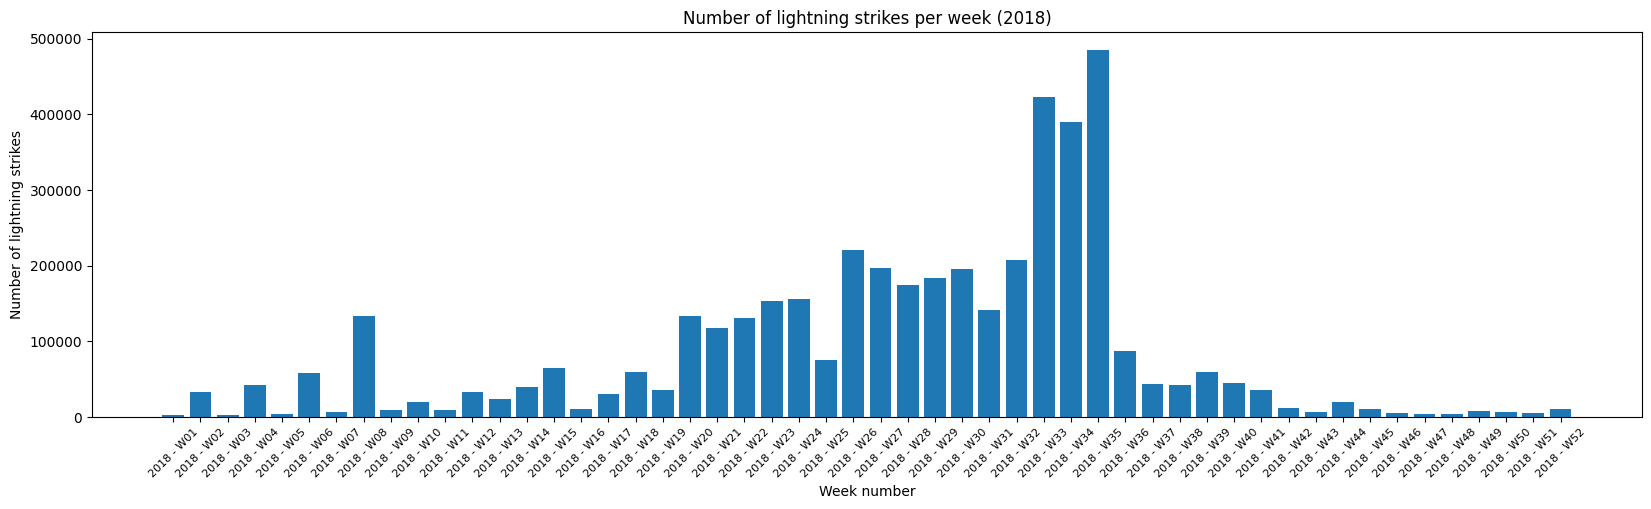

In [18]:
#adjust the graph
plt.figure(figsize = (20,5))
plt.bar(x = df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week (2018)")
plt.xticks(rotation = 45 , fontsize= 8)

plt.show()

**Plot the number of quarterly lightning strikes from 2016–2018**

In [21]:
df_by_quarter = df['number_of_strikes'].div(1000000)
df_by_quarter.head()

,number_of_strikes
0,0.000016
1,0.000016
2,0.000016
3,0.000016
4,0.000016


In [24]:
#format numbers
df_by_quarter = df.groupby(['quarter']).sum('numeric_type = True').reset_index()

# Format as text, in millions.
df_by_quarter['number_of_strikes_formatted'] = df_by_quarter['number_of_strikes'].div(1000000).round(1).astype(str) + 'M'

df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted
0,2016 -Q1,261144,0.3M
1,2016 -Q2,1510996,1.5M
2,2016 -Q3,2186856,2.2M
3,2016 -Q4,193897,0.2M
4,2017 -Q1,243765,0.2M


Before we start plotting, let's write a function that will help label each bar in the plot with its corresponding number_of_strikes_formatted text. The function uses plt.text(), which is a pyplot function whose positional arguments are x, y, and s. x represents the x-axis coordinates, y represents the y-axis coordinates, and s represents the text that we want to appear at these coordinates.

In [25]:
#add labels
def addlabels(x,y,labels):
  for i in range(len(x)):
    plt.text(i, y[i], labels[i] , ha = 'center' , va = 'bottom')

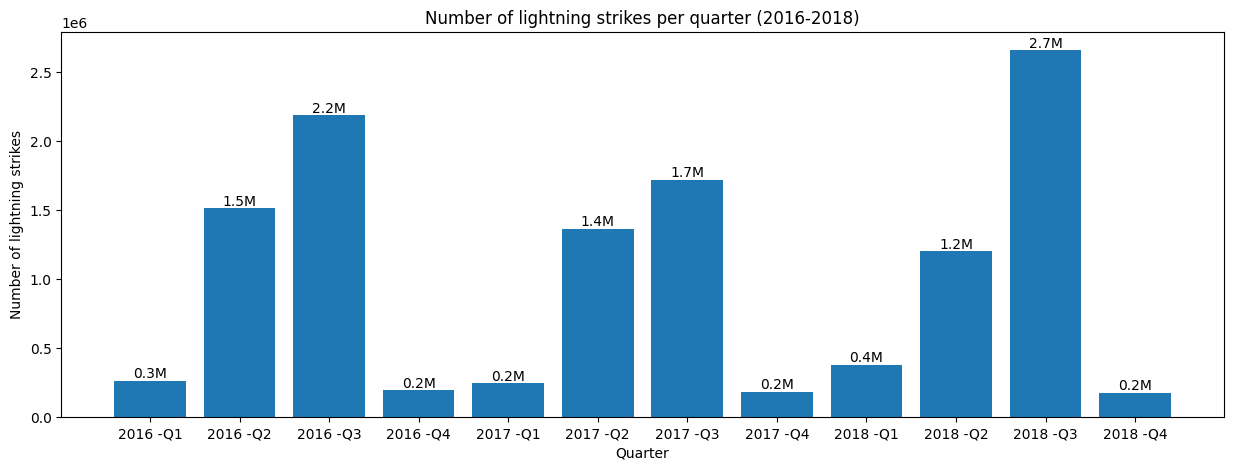

In [26]:
plt.figure(figsize = (15, 5))
plt.bar(x = df_by_quarter['quarter'], height = df_by_quarter['number_of_strikes'])
addlabels(df_by_quarter['quarter'], df_by_quarter['number_of_strikes'], df_by_quarter['number_of_strikes_formatted'])
plt.plot()
plt.xlabel('Quarter')
plt.ylabel('Number of lightning strikes')
plt.title('Number of lightning strikes per quarter (2016-2018)')
plt.show()

In [28]:
# Create two new columns.
df_by_quarter['quarter_number'] = df_by_quarter['quarter'].str[-2:]
df_by_quarter['year'] = df_by_quarter['quarter'].str[:4]
df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted,quarter_number,year
0,2016 -Q1,261144,0.3M,Q1,2016
1,2016 -Q2,1510996,1.5M,Q2,2016
2,2016 -Q3,2186856,2.2M,Q3,2016
3,2016 -Q4,193897,0.2M,Q4,2016
4,2017 -Q1,243765,0.2M,Q1,2017


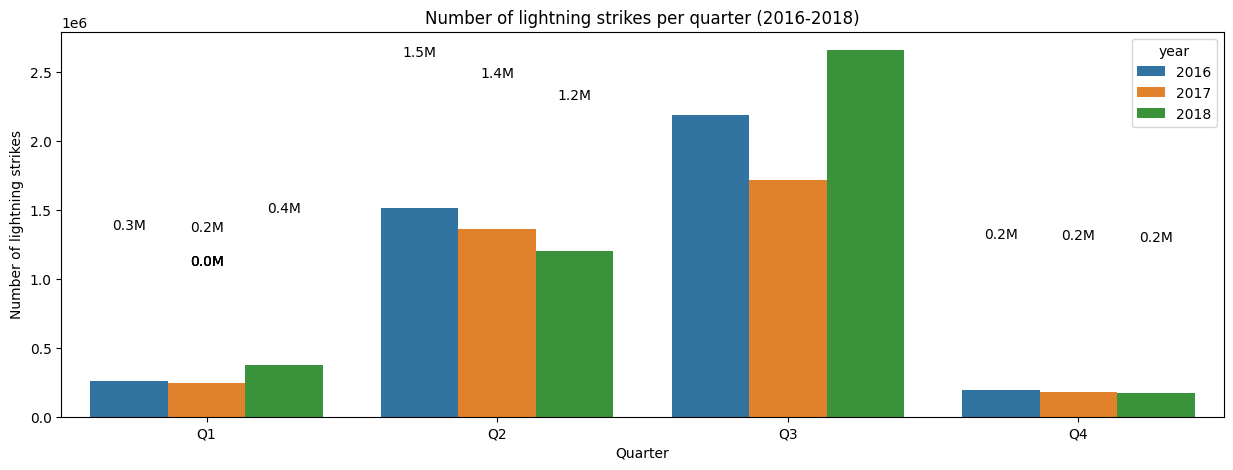

In [31]:
plt.figure(figsize = (15, 5))
p = sns.barplot(
    data = df_by_quarter,
    x = 'quarter_number',
    y = 'number_of_strikes',
    hue = 'year')
for b in p.patches:
    p.annotate(str(round(b.get_height()/1000000, 1))+'M',
                   (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6),
                   ha = 'center', va = 'bottom',
                   xytext = (0, -12),
                   textcoords = 'offset points')
plt.xlabel("Quarter")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per quarter (2016-2018)")
plt.show()